## Unsupervised Anomaly Detection

In [13]:
import pandas as pd
import numpy as np
import pickle as pkl
import matplotlib.pyplot as plt
import time
from sklearn import preprocessing

### Data Directory

In [14]:
INPUT_DIR = '../data/raw/CMAPSSData/'
OUTPUT_DIR = '../data/interim/'

### Read the input data

In [19]:
input_file = INPUT_DIR + 'train_FD001.txt'
col_headers = ['unit', 'time_cycles', 'setting1', 'setting2', 'setting3', 
              'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 
              'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas18', 'meas19', 'meas20', 
              'meas21', 'meas22', 'meas23', 'meas24', 'meas25', 'meas26']

df = pd.read_csv(input_file, header=None, sep=' ', names=col_headers)

In [20]:
df.head()

unit  time_cycles  setting1  setting2  setting3  meas01  meas02   meas03  \
0     1            1   -0.0007   -0.0004     100.0  518.67  641.82  1589.70   
1     1            2    0.0019   -0.0003     100.0  518.67  642.15  1591.82   
2     1            3   -0.0043    0.0003     100.0  518.67  642.35  1587.99   
3     1            4    0.0007    0.0000     100.0  518.67  642.35  1582.79   
4     1            5   -0.0019   -0.0002     100.0  518.67  642.37  1582.85   

    meas04  meas05   ...    meas17  meas18  meas19  meas20   meas21  meas22  \
0  1400.60   14.62   ...       392    2388   100.0   39.06  23.4190     NaN   
1  1403.14   14.62   ...       392    2388   100.0   39.00  23.4236     NaN   
2  1404.20   14.62   ...       390    2388   100.0   38.95  23.3442     NaN   
3  1401.87   14.62   ...       392    2388   100.0   38.88  23.3739     NaN   
4  1406.22   14.62   ...       393    2388   100.0   38.90  23.4044     NaN   

   meas23  meas24  meas25  meas26  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2     NaN     NaN     NaN     NaN  
3     NaN     NaN     NaN     NaN  
4     NaN     NaN     NaN     NaN  

[5 rows x 31 columns]

### Features to use

In [21]:
id_cols = ['unit', 'time_cycles']
feature_set = ['setting1', 'setting2', 'setting3', 
              'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 
              'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas20', 
              'meas21']

In [22]:
cols = feature_set + id_cols

In [23]:
print(cols)

['setting1', 'setting2', 'setting3', 'meas01', 'meas02', 'meas03', 'meas04', 'meas05', 'meas06', 'meas07', 'meas08', 'meas09', 'meas10', 'meas11', 'meas12', 'meas13', 'meas14', 'meas15', 'meas16', 'meas17', 'meas20', 'meas21', 'unit', 'time_cycles']


In [24]:
df = df[cols]

In [25]:
df.head()

setting1  setting2  setting3  meas01  meas02   meas03   meas04  meas05  \
0   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   14.62   
1    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   14.62   
2   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   14.62   
3    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   14.62   
4   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   14.62   

   meas06  meas07     ...       meas12   meas13   meas14  meas15  meas16  \
0   21.61  554.36     ...       521.66  2388.02  8138.62  8.4195    0.03   
1   21.61  553.75     ...       522.28  2388.07  8131.49  8.4318    0.03   
2   21.61  554.26     ...       522.42  2388.03  8133.23  8.4178    0.03   
3   21.61  554.45     ...       522.86  2388.08  8133.83  8.3682    0.03   
4   21.61  554.00     ...       522.19  2388.04  8133.80  8.4294    0.03   

   meas17  meas20   meas21  unit  time_cycles  
0     392   39.06  23.4190     1            1  
1     392   39.00  23.4236     1            2  
2     390   38.95  23.3442     1            3  
3     392   38.88  23.3739     1            4  
4     393   38.90  23.4044     1            5  

[5 rows x 24 columns]

### Standardizing the dataset

In [29]:
# Preprocessing the dataset

X = df[feature_set]

normalized_X = preprocessing.normalize(X)

In [30]:
normalized_X

array([[-5.44299580e-08, -3.11028331e-08,  7.77570829e-03, ...,
         3.04807765e-02,  3.03719166e-03,  1.82099312e-03],
       [ 1.47801005e-07, -2.33370007e-08,  7.77900024e-03, ...,
         3.04936809e-02,  3.03381009e-03,  1.82212190e-03],
       [-3.34316004e-07,  2.33243723e-08,  7.77479078e-03, ...,
         3.03216840e-02,  3.02828101e-03,  1.81496271e-03],
       ...,
       [ 3.10541950e-08,  0.00000000e+00,  7.76354875e-03, ...,
         3.08989240e-02,  2.98430814e-03,  1.78043792e-03],
       [-8.53696531e-08,  2.32826327e-08,  7.76087756e-03, ...,
         3.06554664e-02,  2.97164002e-03,  1.78996880e-03],
       [-2.48536756e-07, -3.88338682e-08,  7.76677364e-03, ...,
         3.07564236e-02,  2.98011104e-03,  1.79041219e-03]])

In [41]:
from collections import Counter
from sklearn.cluster import DBSCAN


def dbscan_gridsearch(X, eps_list, min_pts_list):
    
    print('Instances = ', len(X))
    print('| Eps | \tmpts | \tClus | \tAnom | \tTime |')
    print('| -- | -- | -- | -- | -- |')
    
    for eps in eps_list:
        for min_samples in min_pts_list:

            tic = time.time()
            clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X)
            toc = time.time()
            total_time = toc-tic

            labels = clustering.labels_
            unq_labels = np.unique(labels)

            counter = Counter(labels)

            outliers_count = 0
            # The percentages in frequency_dict wont add upto 100 since only
            # values more than 1 are added to the new dictionary - look at the 
            # if statement below
            frequency_dict = {}
            for k in counter:
                v = counter[k]
                frequency_dict[k] = v

                if k == -1:
                    outliers_count = v

            print('|' + str(eps) + '|\t' + str(min_samples) + '|\t' + str(len(unq_labels)-1) + '|\t' + str(outliers_count) + '|\t' + str(total_time) + '|')

        # print('------------------------------------')
    # print('------------------------------------')

In [42]:
# eps_list = [0.55, 0.60, 0.7, 0.8, 0.9, 0.95]
eps_list = [0.00025, 0.0005, 0.0010, 0.0015, 0.0020]
min_pts_list = [100, 500, 1000, 2000, 3000]
dbscan_gridsearch(X=normalized_X, eps_list=eps_list, min_pts_list=min_pts_list)

Instances =  20631
| Eps | 	mpts | 	Clus | 	Anom | 	Time |
| -- | -- | -- | -- | -- |
|0.00025|	100|	1|	9058|	2.0347046852111816|
|0.00025|	500|	0|	20631|	2.195358991622925|
|0.00025|	1000|	0|	20631|	2.4198458194732666|
|0.00025|	2000|	0|	20631|	2.1620230674743652|
|0.00025|	3000|	0|	20631|	2.155635118484497|
|0.0005|	100|	1|	485|	6.564364671707153|
|0.0005|	500|	1|	2358|	6.219232082366943|
|0.0005|	1000|	1|	3594|	6.30226993560791|
|0.0005|	2000|	1|	5820|	6.159160137176514|
|0.0005|	3000|	1|	10015|	6.168156862258911|
|0.001|	100|	1|	5|	15.277857065200806|
|0.001|	500|	1|	102|	15.33348298072815|
|0.001|	1000|	1|	247|	14.73108196258545|
|0.001|	2000|	1|	511|	15.128291130065918|
|0.001|	3000|	1|	689|	14.781724214553833|
|0.0015|	100|	0|	0|	16.262884855270386|
|0.0015|	500|	1|	5|	16.610839128494263|
|0.0015|	1000|	1|	38|	17.061471939086914|
|0.0015|	2000|	1|	84|	17.34055995941162|
|0.0015|	3000|	1|	120|	16.631626844406128|
|0.002|	100|	0|	0|	13.111048936843872|
|0.002|	500|	0|	0|	13.122919

## Using specific hyperparameters

In [78]:
mpts = 3000
eps = 0.001

X = df[feature_set]
X = normalized_X.copy()
clustering = DBSCAN(eps=eps, min_samples=mpts).fit(X)
labels = clustering.labels_

In [79]:
# Get the basic statistics for the clustering results 
# -1 cluster is a set of outliers

unq_labels = np.unique(labels)
counter = Counter(labels)
counter

Counter({0: 19942, -1: 689})

In [80]:
df['labels'] = labels

## Write down the results into csv

In [86]:
op_file = OUTPUT_DIR + 'dbscan_results_' + str(mpts) + '_' + str(eps) + '.csv'
with open(op_file, 'wb') as f:
    df.to_csv(op_file, header=True, index=False, sep=',')

print('Writing to ', op_file)

Writing to  ../data/interim/dbscan_results_3000_0.001.csv


In [81]:
df.head()

setting1  setting2  setting3  meas01  meas02   meas03   meas04  meas05  \
0   -0.0007   -0.0004     100.0  518.67  641.82  1589.70  1400.60   14.62   
1    0.0019   -0.0003     100.0  518.67  642.15  1591.82  1403.14   14.62   
2   -0.0043    0.0003     100.0  518.67  642.35  1587.99  1404.20   14.62   
3    0.0007    0.0000     100.0  518.67  642.35  1582.79  1401.87   14.62   
4   -0.0019   -0.0002     100.0  518.67  642.37  1582.85  1406.22   14.62   

   meas06  meas07   ...     meas13   meas14  meas15  meas16  meas17  meas20  \
0   21.61  554.36   ...    2388.02  8138.62  8.4195    0.03     392   39.06   
1   21.61  553.75   ...    2388.07  8131.49  8.4318    0.03     392   39.00   
2   21.61  554.26   ...    2388.03  8133.23  8.4178    0.03     390   38.95   
3   21.61  554.45   ...    2388.08  8133.83  8.3682    0.03     392   38.88   
4   21.61  554.00   ...    2388.04  8133.80  8.4294    0.03     393   38.90   

    meas21  unit  time_cycles  labels  
0  23.4190     1            1       0  
1  23.4236     1            2       0  
2  23.3442     1            3       0  
3  23.3739     1            4       0  
4  23.4044     1            5       0  

[5 rows x 25 columns]

## Plot the graph for each feature

In [87]:
import math

def plot_graphs_label(df, feature, units_per_graph):
        
    colors = ['b', 'r', 'c', 'm', 'g', 'k', 'y']
    xlabel = 'Time'
    ylabel = 'Value'

    unit_start = 0
    time_col = 'time_cycles'

    total_plots = math.ceil(100 / units_per_graph)
    cols_plot = 2
    rows_plot = math.ceil(total_plots/cols_plot)
    
    print('Rows', rows_plot, 'Total', total_plots)

    plt.rcParams['figure.figsize'] = [cols_plot * 10, rows_plot * 7] # Size of the plots        
    plt.figure()
    
    unq_labels = np.unique(df['labels'])
    unq_labels.sort()
   
    idx = 1

    for i in range(total_plots):

        start_unit = (i) * units_per_graph + 1
        end_unit = start_unit + units_per_graph - 1

        plt.subplot(rows_plot, cols_plot, i+1)
        plt.ylabel(feature)
        plt.xlabel(time_col)
        plt.xticks(rotation=45)
        plt.title('Units ' + str(start_unit) + '-' + str(end_unit))

        for current_unit in range(start_unit, end_unit+1, 1):
            
            color = colors[current_unit%len(colors)]
            
            df_sub = df.loc[df['unit'] == current_unit]
            df_sub = df_sub[[time_col, feature]]            
            
            x = df_sub['time_cycles']
            y = df_sub[feature]

            plt.plot(x, y, c=color, linewidth=1)
            
            # Only scatter plot the outliers              
            df_cluster = df_sub.loc[df['labels'] == -1]
            x = np.array(df_cluster[time_col])
            y = np.array(df_cluster[feature])
            
            size = 20
            alpha = 1
            plt.scatter(x, y, c=color, alpha=alpha, s=size, label='Outliers')

    plt.show()

Rows 50 Total 100


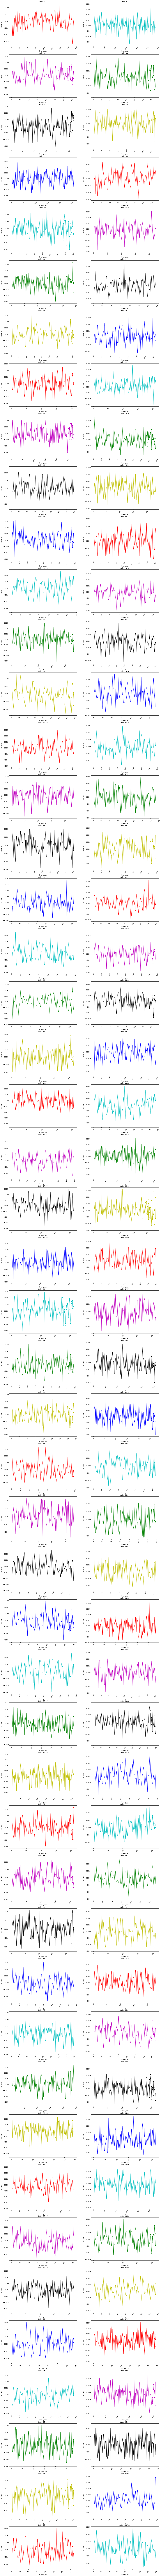

In [88]:
feature = 'setting1'
plot_graphs_label(df=df, feature=feature, units_per_graph=1)